# Predicting Sentiment from Tweets
Sentiment analysis using NLTK and Machine Learning

### Step 1: Importing necessary libraries and nltk resources for dataset

In [ ]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
import random
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fatbardh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Fatbardh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Fatbardh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Fatbardh\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fatbardh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step 2: Loading the dataset

In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = positive_tweets + negative_tweets
labels = [1]*len(positive_tweets) + [0]*len(negative_tweets)

In [6]:
# We look at the first 10 tweets from the positive and negative tweets
print("Positive tweets:", positive_tweets[:10])
print("Negative tweets:", negative_tweets[:10])

Positive tweets: ['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house ware

In [7]:
from collections import Counter
print(Counter(labels))  # Check the number of positive and negative labels

Counter({1: 5000, 0: 5000})


### Step 3: Preprocessing the Dataset

#### Removing URLs from Tweets

In [ ]:
tweets_no_urls = [re.sub(r'https?:\/\/\S+', '', tweet) for tweet in tweets]
print(tweets_no_urls[:5])  # Display the first 5 tweets without URLs

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']


#### Removing punctuation from tweets

In [ ]:
tweets_no_punctuation = [re.sub(r'[^\w\s]', '', tweet) for tweet in tweets_no_urls]
print(tweets_no_punctuation[:5])  # Display the first 5 tweets without punctuation

['FollowFriday France_Inte PKuchly57 Milipol_Paris for being top engaged members in my community this week ', 'Lamb2ja Hey James How odd  Please call our Contact Centre on 02392441234 and we will be able to assist you  Many thanks', 'DespiteOfficial we had a listen last night  As You Bleed is an amazing track When are you in Scotland', '97sides CONGRATS ', 'yeaaaah yippppy  my accnt verified rqst has succeed got a blue tick mark on my fb profile  in 15 days']


#### Tokenization

In [10]:
# Tokenize the tweets. I am tokenizing the tweets into words instead of sentences, because the tweets are short. 

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweets_tokenized = [tokenizer.tokenize(tweet) for tweet in tweets_no_punctuation]
print(tweets_tokenized[:5])  # Display the first 5 tokenized tweets

[['followfriday', 'france_inte', 'pkuchly', '57', 'milipol_paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week'], ['lamb', '2ja', 'hey', 'james', 'how', 'odd', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', 'many', 'thanks'], ['despiteofficial', 'we', 'had', 'a', 'listen', 'last', 'night', 'as', 'you', 'bleed', 'is', 'an', 'amazing', 'track', 'when', 'are', 'you', 'in', 'scotland'], ['97sides', 'congrats'], ['yeaaah', 'yipppy', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', 'in', '15', 'days']]


Remove Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
tweets_no_stopwords = [[word for word in tweet if word not in stop_words] for tweet in tweets_tokenized]
print(tweets_no_stopwords[:5])  # Display the first 5 tweets without stopwords

[['followfriday', 'france_inte', 'pkuchly', '57', 'milipol_paris', 'top', 'engaged', 'members', 'community', 'week'], ['lamb', '2ja', 'hey', 'james', 'odd', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'many', 'thanks'], ['despiteofficial', 'listen', 'last', 'night', 'bleed', 'amazing', 'track', 'scotland'], ['97sides', 'congrats'], ['yeaaah', 'yipppy', 'accnt', 'verified', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profile', '15', 'days']]


#### Stemming

In [12]:
# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming to the tokenized tweets
tweets_stemmed = [[stemmer.stem(word) for word in tweet] for tweet in tweets_no_stopwords]
print(tweets_stemmed[:5])  # Display the first 5 stemmed tweets

[['followfriday', 'france_int', 'pkuchli', '57', 'milipol_pari', 'top', 'engag', 'member', 'commun', 'week'], ['lamb', '2ja', 'hey', 'jame', 'odd', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', 'mani', 'thank'], ['despiteoffici', 'listen', 'last', 'night', 'bleed', 'amaz', 'track', 'scotland'], ['97side', 'congrat'], ['yeaaah', 'yipppi', 'accnt', 'verifi', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profil', '15', 'day']]


#### Rejoining Tokens into clean dataset

In [ ]:
cleaned_tweets = [' '.join(tweet) for tweet in tweets_stemmed]
print(cleaned_tweets[:5])  # Display the first 5 cleaned tweets

['followfriday france_int pkuchli 57 milipol_pari top engag member commun week', 'lamb 2ja hey jame odd pleas call contact centr 02392441234 abl assist mani thank', 'despiteoffici listen last night bleed amaz track scotland', '97side congrat', 'yeaaah yipppi accnt verifi rqst succeed got blue tick mark fb profil 15 day']


### Step 4: Train-test Split

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(cleaned_tweets, labels, test_size=0.3, random_state=42)

### Step 5: Vectorization with TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

### Step 6: Modelling

#### Logistic Regression

In [16]:
# Train classifier
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 75.03 %

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      1463
           1       0.78      0.72      0.75      1537

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



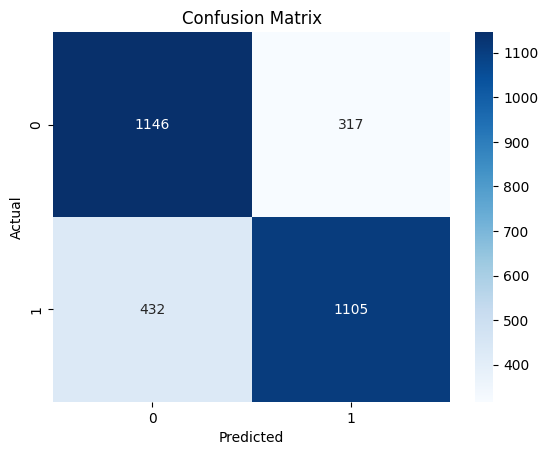

In [17]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Show some predictions
print("\nSample Predictions:\n")
for idx in random.sample(range(len(y_test)), 10):
    tweet_text = X_test_raw[idx]
    prediction = model.predict(vectorizer.transform([tweet_text]))[0]
    actual = y_test[idx]
    sentiment_pred = "Positive" if prediction == 1 else "Negative"
    sentiment_true = "Positive" if actual == 1 else "Negative"
    print(f"TWEET: {tweet_text}\n→ Predicted: {sentiment_pred} | Actual: {sentiment_true}\n")


Sample Predictions:

TWEET: hi want get connect koreachol plan come south korea
→ Predicted: Negative | Actual: Positive

TWEET: artforcaus glad sonal instagram what id
→ Predicted: Positive | Actual: Positive

TWEET: absolut gut jame bay ticket sold manchest
→ Predicted: Negative | Actual: Negative

TWEET: may brain tumor si vivian mmsmalubhangsakit
→ Predicted: Positive | Actual: Negative

TWEET: haydenwellsss joshwalk 93 noo sad time rubi replac shuffl act
→ Predicted: Negative | Actual: Negative

TWEET: weeklychri im sorri sweeti one deserv
→ Predicted: Negative | Actual: Negative

TWEET: 20 ghanton se light nahi
→ Predicted: Negative | Actual: Positive

TWEET: cant date someon white sorri yo grandpa prolli wanna burn
→ Predicted: Negative | Actual: Positive

TWEET: cant sleep work 6 12 hour
→ Predicted: Negative | Actual: Negative

TWEET: emperorjepp yeah next prey poor girl
→ Predicted: Negative | Actual: Negative



#### Naive Bayes Model

Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1463
           1       0.78      0.70      0.74      1537

    accuracy                           0.74      3000
   macro avg       0.75      0.75      0.74      3000
weighted avg       0.75      0.74      0.74      3000



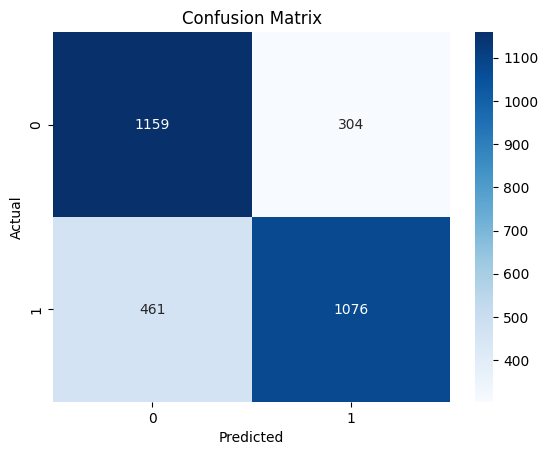


Sample Predictions:

TWEET: the_witty_srk deewaniveronica count p 28 bnte hain p
→ Predicted: Negative | Actual: Positive

TWEET: tangerinebean got bed yet
→ Predicted: Negative | Actual: Positive

TWEET: seniorspazz tehsmiley bore everyth
→ Predicted: Negative | Actual: Positive

TWEET: sandeul 203092 fine
→ Predicted: Positive | Actual: Negative

TWEET: look like final time get rid old 2500k
→ Predicted: Negative | Actual: Negative

TWEET: beckparson 1 im 24 hour sleep sunday xx
→ Predicted: Negative | Actual: Negative

TWEET: theemblaz cnni isi chan
→ Predicted: Negative | Actual: Positive

TWEET: junaidog kyunk aitchison hai p look respons origin tweet youll know brother
→ Predicted: Positive | Actual: Positive

TWEET: dxuntlesslarri fback
→ Predicted: Positive | Actual: Positive

TWEET: im sorri block
→ Predicted: Negative | Actual: Negative



In [19]:
# Train classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Show some predictions
print("\nSample Predictions:\n")
for idx in random.sample(range(len(y_test)), 10):
    tweet_text = X_test_raw[idx]
    prediction = model.predict(vectorizer.transform([tweet_text]))[0]
    actual = y_test[idx]
    sentiment_pred = "Positive" if prediction == 1 else "Negative"
    sentiment_true = "Positive" if actual == 1 else "Negative"
    print(f"TWEET: {tweet_text}\n→ Predicted: {sentiment_pred} | Actual: {sentiment_true}\n")

### SVM

Accuracy: 0.7363333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1463
           1       0.76      0.72      0.74      1537

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000



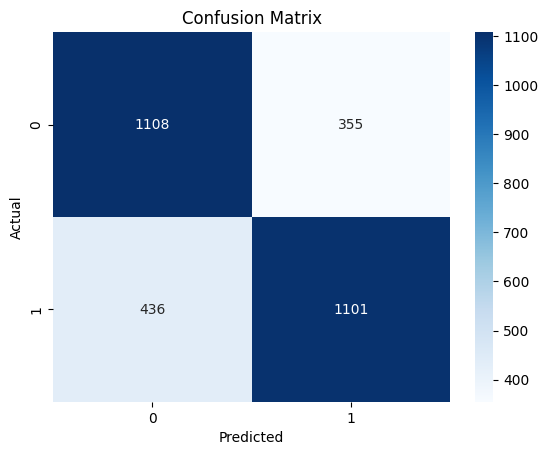

In [20]:
from sklearn.svm import LinearSVC

# Train classifier
model = LinearSVC()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGBoost

Accuracy: 0.7226666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.74      1463
           1       0.79      0.62      0.70      1537

    accuracy                           0.72      3000
   macro avg       0.73      0.73      0.72      3000
weighted avg       0.74      0.72      0.72      3000



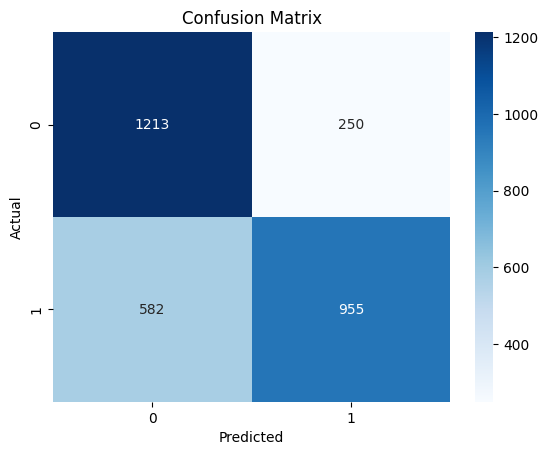

In [21]:
from xgboost import XGBClassifier

# Train classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see that from the models we tried, LogisticRegression yielded the best results, so we will save the model.

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Save the model and vectorizer
joblib.dump(lr_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved.")

Model and vectorizer saved.


#### Predicting sentiment on new tweet.

In [23]:
# Below is a function to preprocess tweets for prediction based on all the steps I took above.

def preprocess(tweet):
    # Remove URLs
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Tokenize
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Rejoin tokens
    return ' '.join(tokens)

In [24]:
#  Predict sentiment on new tweet
def predict_sentiment(tweet):
    cleaned = preprocess(tweet)
    vectorized = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

# Test the function
sample_tweet = "I absolutely love the new design!"
print(f"Tweet: {sample_tweet}")
print("Predicted Sentiment:", predict_sentiment(sample_tweet))

Tweet: I absolutely love the new design!
Predicted Sentiment: Positive


In [25]:
#  Predict sentiment on new tweet
def predict_sentiment(tweet):
    cleaned = preprocess(tweet)
    vectorized = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

# Test the function
sample_tweet = "You are ugly and stupid!"
print(f"Tweet: {sample_tweet}")
print("Predicted Sentiment:", predict_sentiment(sample_tweet))

Tweet: You are ugly and stupid!
Predicted Sentiment: Negative
